In [1]:
# softmax for iris classification

import numpy as np
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

### Data preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]

# add 1
X = np.hstack((np.ones((150, 1)), X))

# predict    
def predict(x, theta):
    return tf.math.softmax(tf.matmul(x, theta))

    
### weights
theta = tf.Variable(tf.random.normal((5, 3), dtype=tf.float64))

### training
learning_rate = 0.1
num_epochs = 2000

### loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy()

losses = [] # for debug
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = predict(X, theta)
        
        # loss
        loss_v = loss(y, output)
        losses.append(loss_v.numpy())
        
        # gradient
        dtheta = t.gradient(loss_v, theta)
        
        # update
        theta.assign_sub(learning_rate * dtheta) 

Text(0, 0.5, 'Loss')

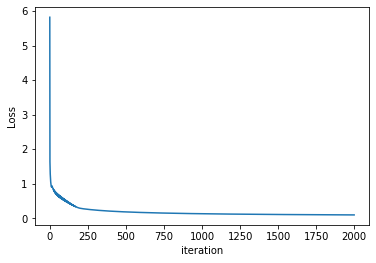

In [3]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')

In [4]:
preds = predict(X, theta)

preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

acc = np.mean(predicted_class == y[:,0])
print(acc.mean())

0.9733333333333334


In [5]:
# large init values for theta

import numpy as np
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

### Data preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]

# add 1
X = np.hstack((np.ones((150, 1)), X))

# predict    
def predict(x, theta):
    return tf.math.softmax(tf.matmul(x, theta))

    
### weights
theta = tf.Variable(tf.random.normal((5, 3), dtype=tf.float64)*5)

### training
learning_rate = 0.1
num_epochs = 2000

### loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy()

losses = [] # for debug
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = predict(X, theta)
        
        # loss
        loss_v = loss(y, output)
        losses.append(loss_v.numpy())
        
        # gradient
        dtheta = t.gradient(loss_v, theta)
        
        # update
        theta.assign_sub(learning_rate * dtheta) 

Text(0, 0.5, 'Loss')

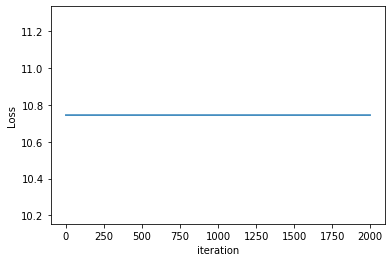

In [6]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')

In [8]:
preds = predict(X, theta)

preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

print(predicted_class)

acc = np.mean(predicted_class == y[:,0])
print(acc.mean())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
0.3333333333333333


In [9]:
# Loss for large weights

import numpy as np
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

### Data preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]

# add 1
X = np.hstack((np.ones((150, 1)), X))

# predict    
def predict(x, theta):
    return tf.math.softmax(tf.matmul(x, theta))

    
### weights
theta = tf.Variable(tf.random.normal((5, 3), dtype=tf.float64)*5)

### training
learning_rate = 0.1
num_epochs = 2000

### loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy()

losses = [] # for debug
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = predict(X, theta)
        
        # loss
        weight_loss = tf.math.reduce_sum(theta**2) / (theta.shape[0]*theta.shape[1])
        loss_v = loss(y, output) + 0.1*weight_loss
        losses.append(loss_v.numpy())
        
        # gradient
        dtheta = t.gradient(loss_v, theta)
        
        # update
        theta.assign_sub(learning_rate * dtheta) 

Text(0, 0.5, 'Loss')

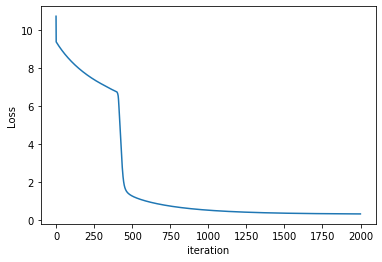

In [10]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')

In [11]:
preds = predict(X, theta)

preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

acc = np.mean(predicted_class == y[:,0])
print(acc.mean())

0.98
